# Ray-tracer setup (2D)
---

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.spatial import Voronoi, voronoi_plot_2d    # Finding neighbors
from scipy.spatial import Delaunay, delaunay_plot_2d  # Finding neighbors

In [2]:
# Create a random set of points
points = np.random.default_rng().random((100,2))

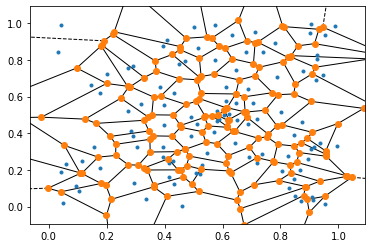

In [3]:
# Create a Voronoi tesselation of the points
# (We use this to find the nearest neighbors)
# https://en.wikipedia.org/wiki/Voronoi_diagram
voronoi = Voronoi(points)
voronoi_plot_2d(voronoi)
plt.show()

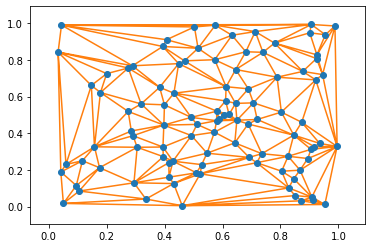

In [4]:
# Create a Delaunay tetrahedralisation of the points
# (We use this to find the nearest neighbors)
# https://en.wikipedia.org/wiki/Delaunay_triangulation
delaunay = Delaunay(points)
delaunay_plot_2d(delaunay)
plt.show()

## Extracting nearset neighbours

In [5]:
# Extract Delaunay vertices (= Voronoi neighbors)
(indptr, indices) = delaunay.vertex_neighbor_vertices
neighbors = [list(indices[indptr[k]:indptr[k+1]]) for k in range(len(points))]
# neighbours is now a list of lists in which the i'th lists containts the list
# of indices of the nearest neighbours of the i'th particle.

## Defining ray directions

In [17]:
nrays = 100
theta = np.arange(0.0, 2.0*np.pi, step=2.0*np.pi/nrays)
rx = np.cos(theta)
ry = np.sin(theta)

In [18]:
dirs = np.array((rx,ry)).transpose()